## PERFORMING EXPLORATORY DATA ANALYSIS (EDA)

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from tqdm import tqdm
import math

data = pd.read_csv("Case_Study_Data.csv")

## PERFORMING SOME UNIVARIATE ANALYSIS

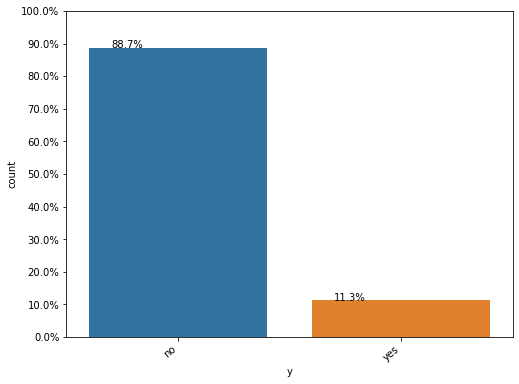

In [4]:
plt.figure(figsize=(8,6))
Y = data["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=data)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

We can clearly see here that 88.7% of the data we have is from the negative class and only a meagre 11.3% is from the positive class, which means this dataset is highly imbalanced and we have to do something in order to address this imbalance.

In [5]:
def histogramPlot(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.show()

## JOB

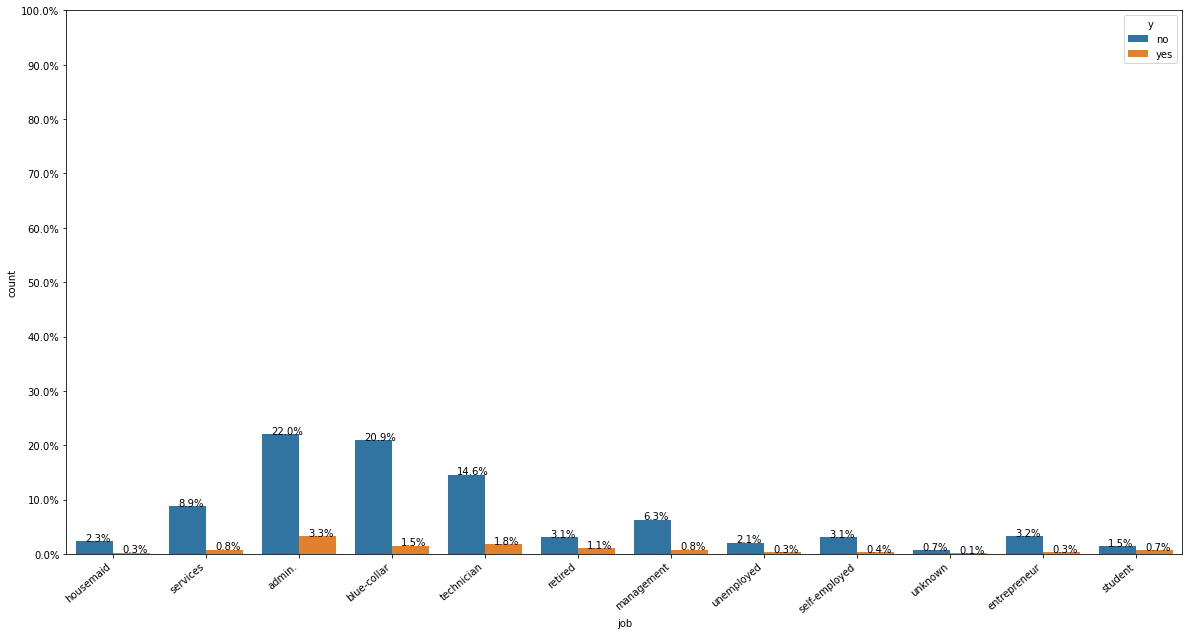

In [6]:
histogramPlot('job', data)

Here, we can see that folks from 'admin' have the highest odds of subscribing to a term deposit, but they also have the highest odds of not subscribing to a term deposit. And the reason for this could simply be most people working for admin.

We can find out the empirical probability/odds of a person subscribing/not subscribing to a term deposit based on their profession, but at this point we aren't so sure whether there is any correlation between 'job' and our target variable.

## MARITAL

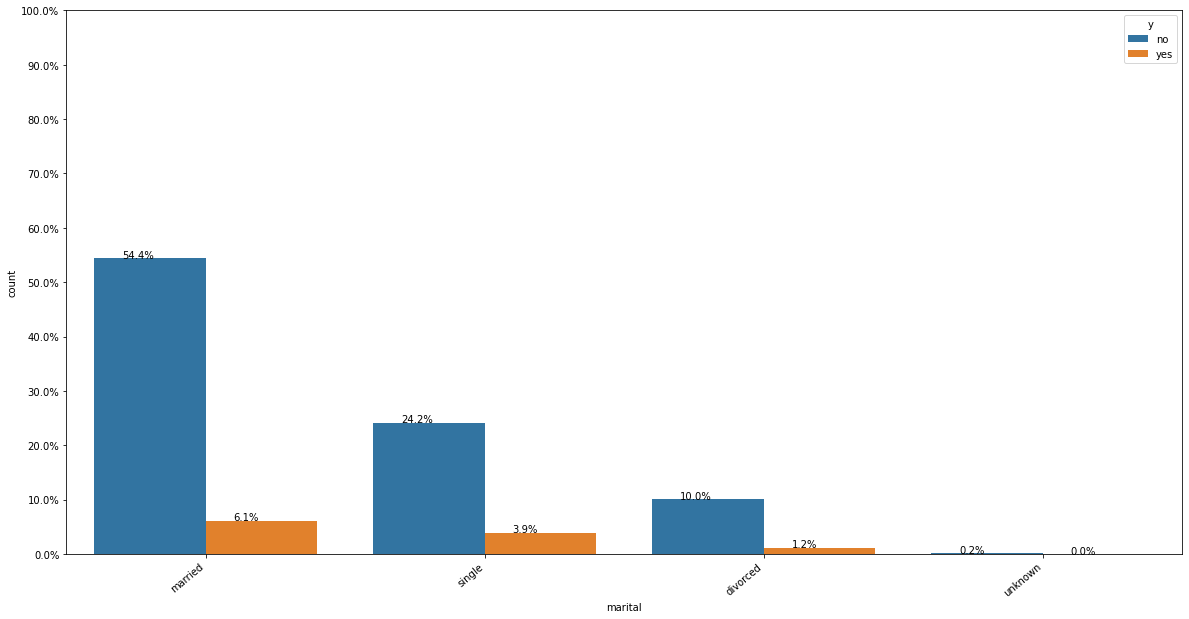

In [7]:
histogramPlot('marital', data)

Majority of the customers are married. And, we can see again that since married folks are in the majority, they have the highest odds of subscribing and not subscribing to term deposits.

## DEFAULT

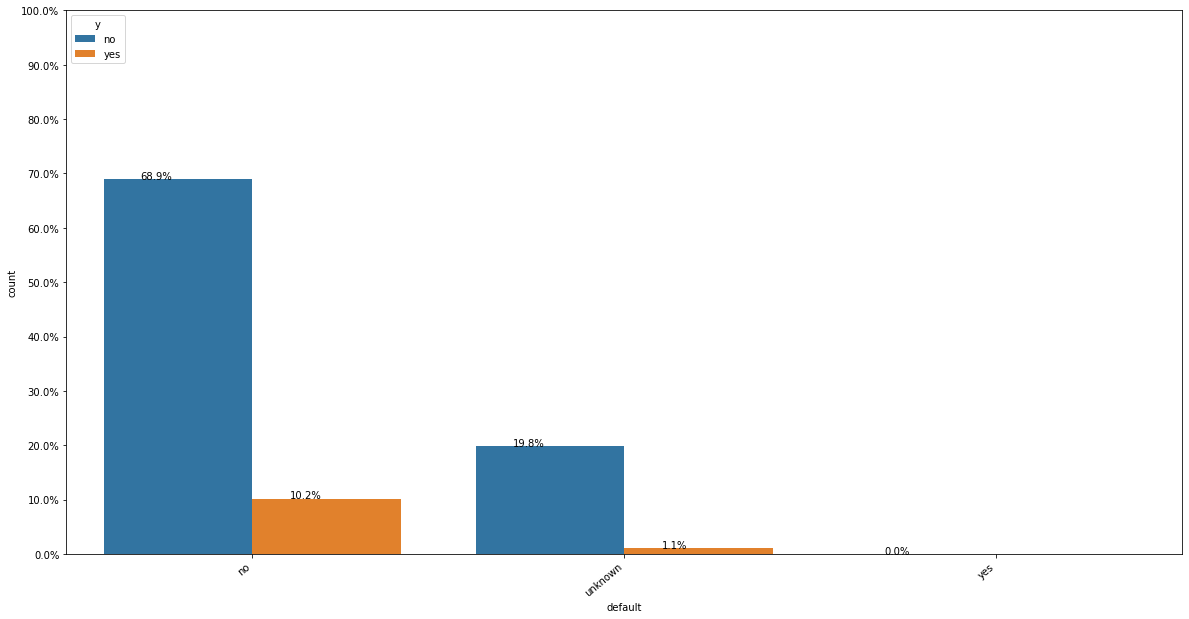

In [8]:
histogramPlot("default", data)

There are hardly any known customers who have credit in default. A vast majority don't have a default in credit.

## EDUCATION

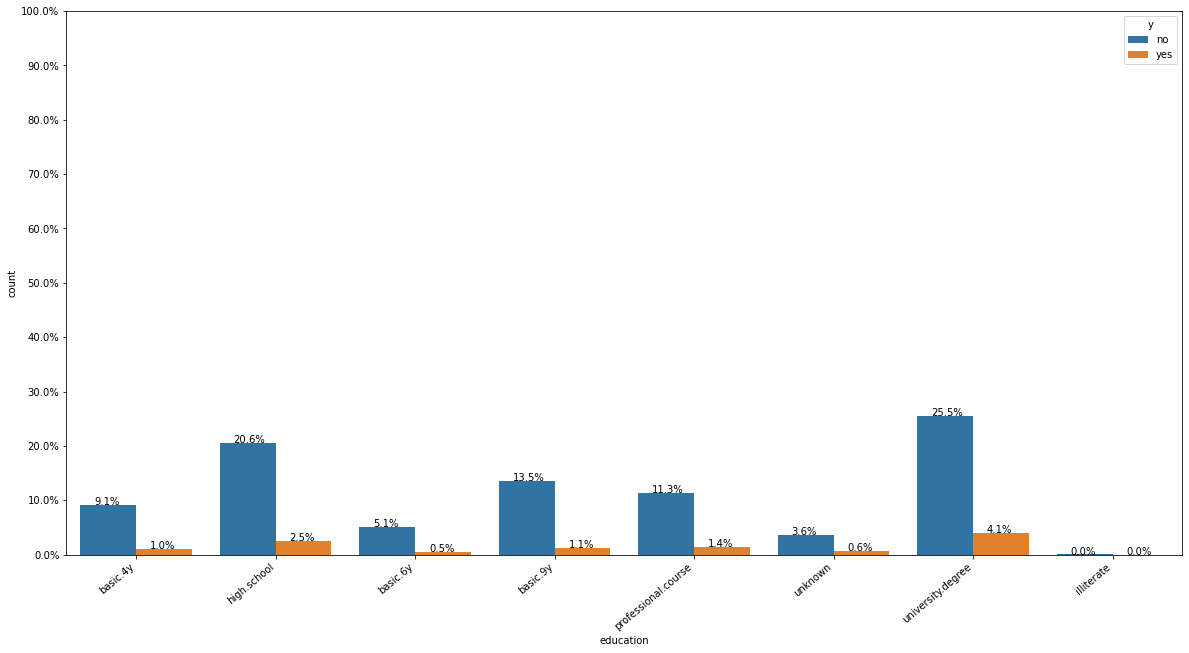

In [9]:
histogramPlot("education", data)

Again, we hardly have any illiterate people in our dataset. Most of our customers have a university degree.

## HOUSING

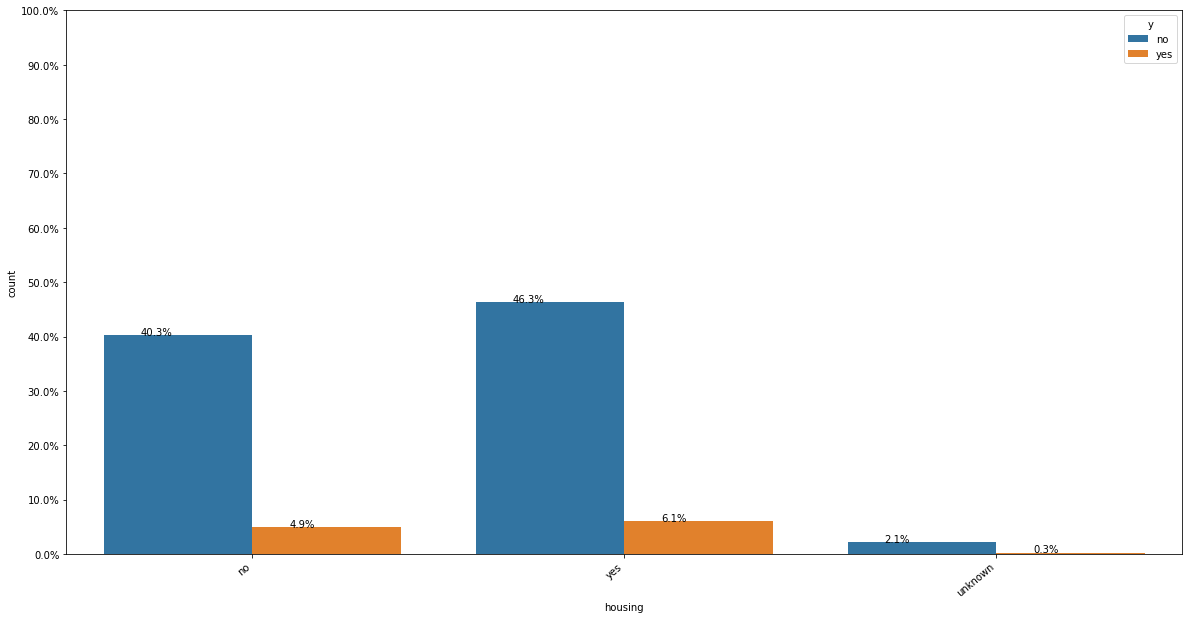

In [10]:
histogramPlot("housing", data)

Nothing much can be said about housing just looking at this histogram. There seems to be some balance in the behaviours between folks who do and don't have housing loans when it comes to subscribing to term deposits. Nothing can be said straight away. We will look at Pearson's Co-relation later to see if we can determine anything more.

## LOAN

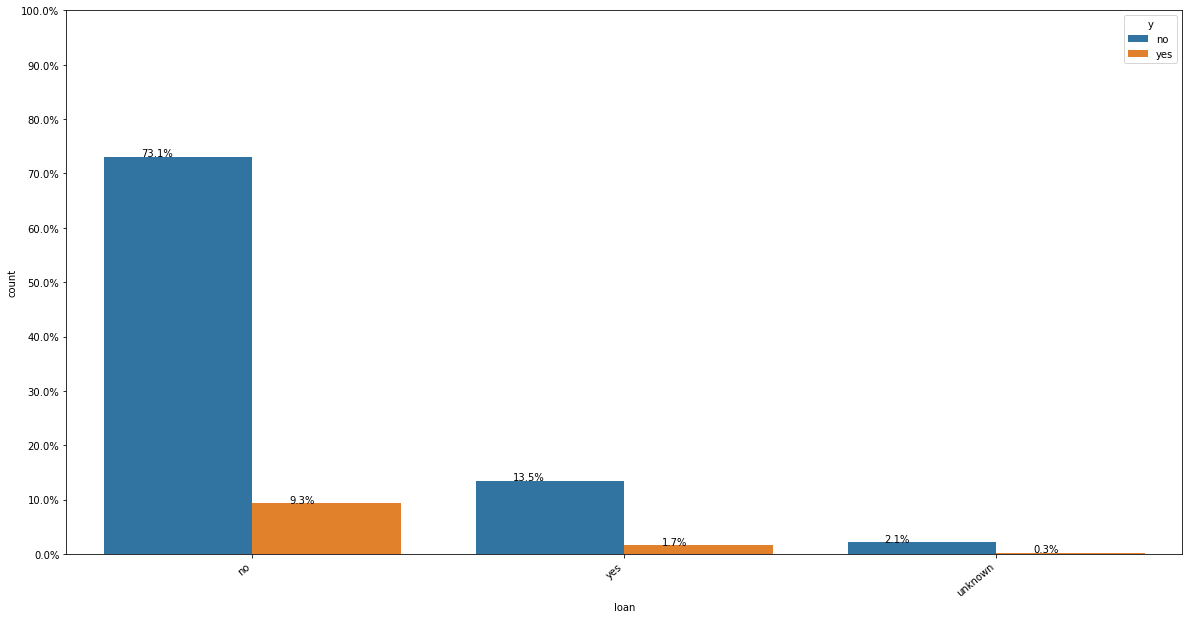

In [11]:
histogramPlot("loan", data)

Almost 83% of the customers don't have personal loans here and most of these people haven't subscribed to term deposits. We could go ahead and say that customers who don't have personal loans are less likely to subscribe to term deposits, but this could again be a case of class imbalance, where we potentially just don't have enough data to be making such calls. We will look at the correlation of this variable with the target variable soon to make more decisions.

## CONTACT

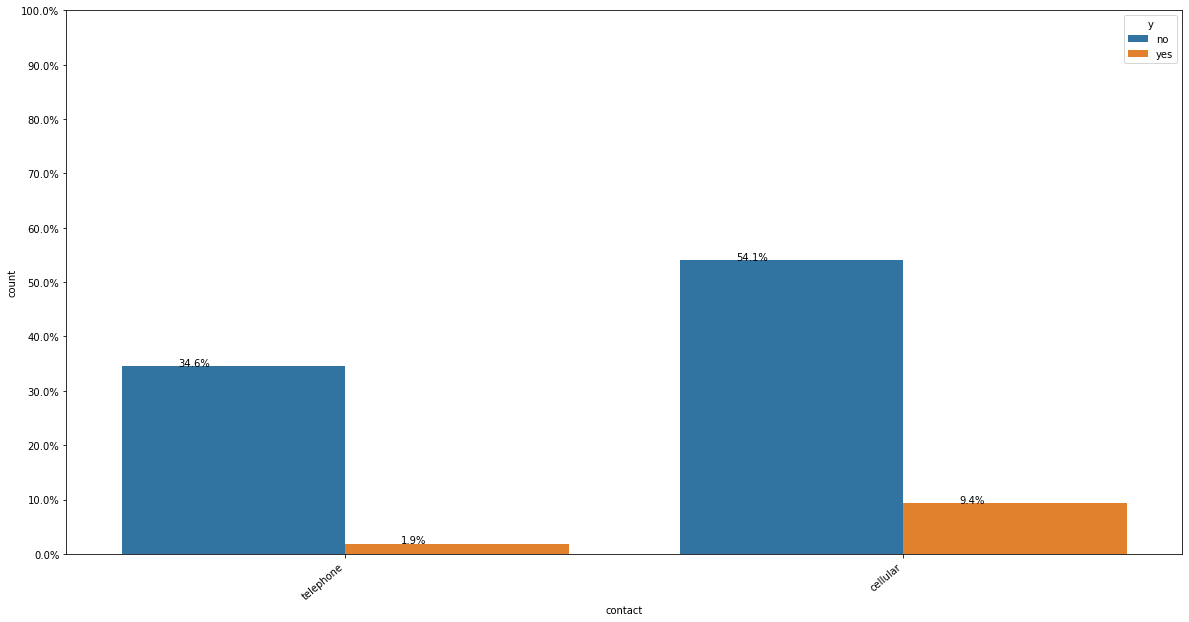

In [12]:
histogramPlot("contact", data)

Right off the bat, on seeing this specific feature, my first thought was "Why would the mode of contact, in any manner, be influential on a customer's decision to subscribe to a term deposit or not?" But data is data and can be useful even if we don't see it at first. So, instead of throwing this feature away, we will explore and see if it could be correlated with the target variable or not. 

Nothing much can be said straight away from the histogram, except for the fact that we have more cellular users than telephone users (Which could be indicative of the fact that we have more younger customers than older customers? But, then again who doesn't own a cellphone these days?) 

## MONTH

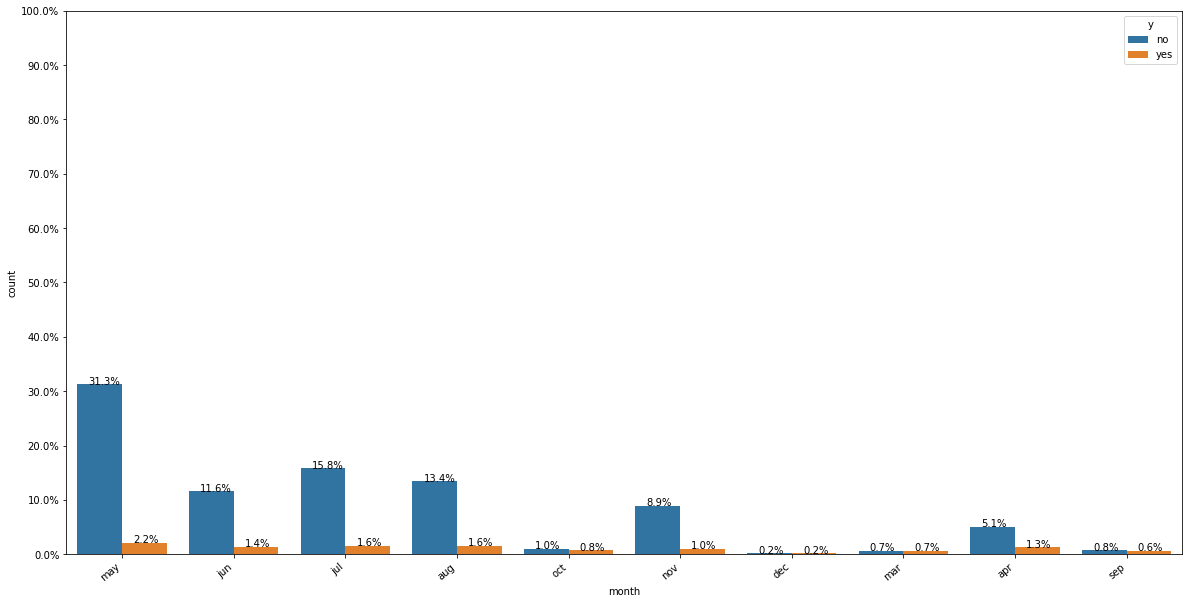

In [13]:
histogramPlot("month", data)

Seems like most customers were last contacted in May and a very small ratio of them were last contacted in December! But, again, we can't come up with any brilliant conclusions based on this histogram.

This feature also initially had me questioning its utility, but like I said before, we'll use Pearson's Correlation to determine how correlated this variable is with the others.

## DAY OF THE WEEK

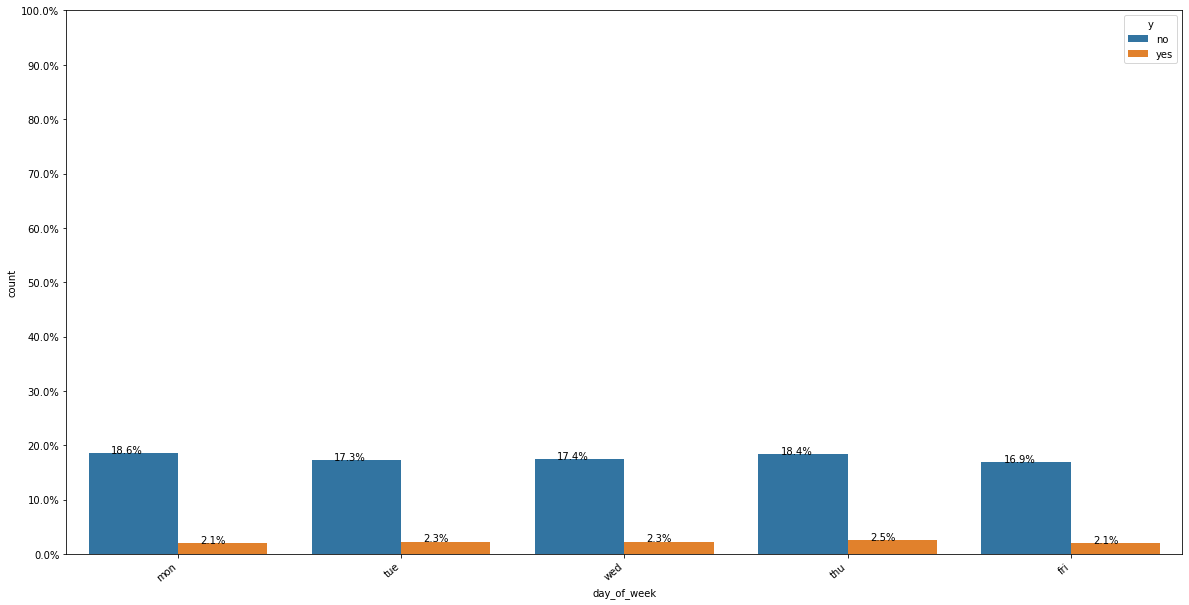

In [14]:
histogramPlot("day_of_week", data)

Like the earlier feature, this one also just seemed reduntant right off the bat. And turns out, this feature could actually be pretty useless. We have the data almost uniformly distributed across all 5 days. Not only that, the yes/no ratio for each day also seems to be pretty uniform. There is nothing special/distinguishing about the data for any particular day of the week.

Hence, judging from this histogram, it makes sense to discard this feature.

## POUTCOME

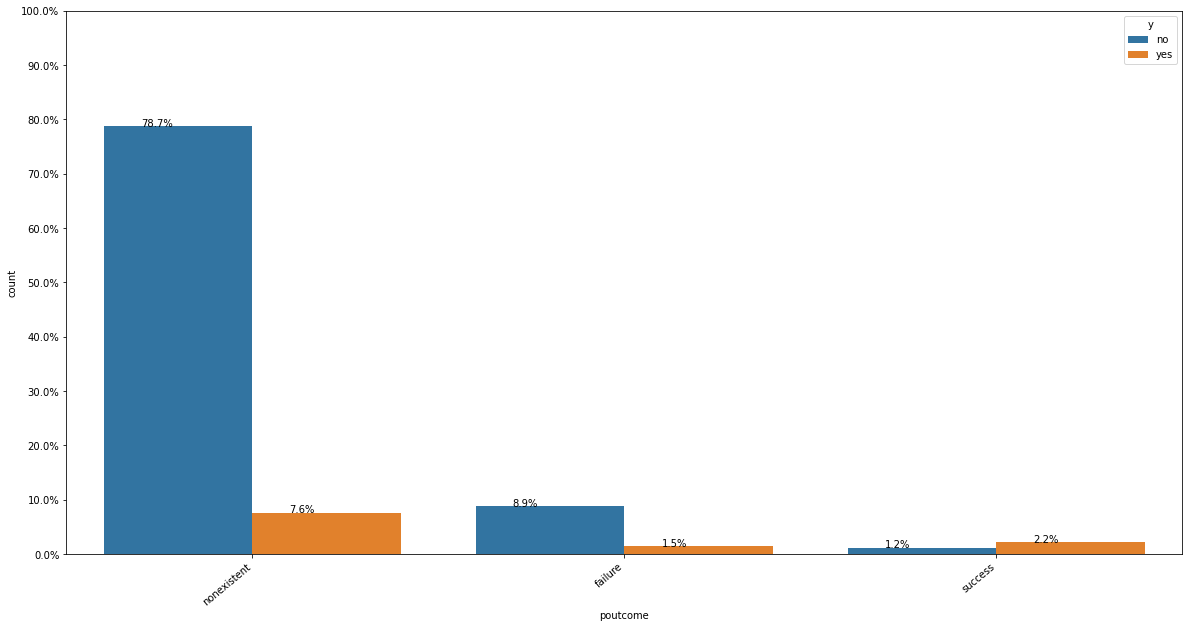

In [15]:
histogramPlot("poutcome", data)

While this feature seems like a pretty important one, we clearly don't have this feature value for most of our customers. The results of the previous ad campaign could potentially have a huge bearing on the results of this campaign.

We see that most of the people who didn't subscribe during the last campaign didn't do so this campaign as well. And a larger proportion of people who subscribed during the last campaign also subscribed to a term deposit this campaign!

Since, we are done with categorical features, we will now use boxplots to represent continuous (numeric) features

## AGE

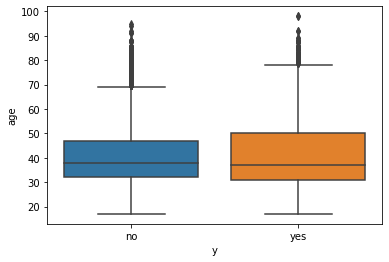

In [16]:
sns.boxplot(data = data, x = "y", y = "age")
plt.show()

This boxplot actually tells us quite a bit. The median (2nd Quartile, Q2) age of both kinds of customers (subscribed/not subscribed) appears to be around the same value in the range of 37-39.

And since the two boxplots coincide quite a fair bit, there is nothing distinguishing about either one. Which probably weakens the case of 'age' for being a meaningful, legitimate feature for our model.

## DURATION

Now, we will not be considering the feature 'duration' here. While it seems like it could be a very handy feature, it doesn't make any sense to include it in our model. We often times make predictions beforehand, and this is a feature value we get to know only after we finish up a call with a customer after which we anyways will come to know if theyve chosen to subscribe or not.

Hence, it doesn't make sense to include this feature in our model and so I won't be doing any analysis on 'duration'

## CAMPAIGN

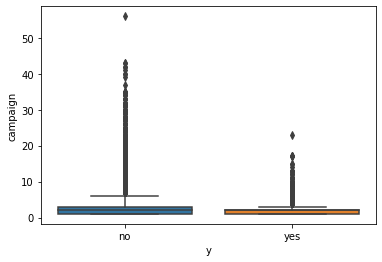

In [17]:
sns.boxplot(data = data, x = "y", y = "campaign")
plt.show()

An initial conjecture was that if the customer was contacted multiple times during this campaign that showed interest in a potential subscription. But, from this boxplot, we can clearly see this is not the case. On average, the median of the customers who didn't subscribe is higher than that of the customers who did subscribe, which is quite the opposite of what I initially had in mind.

We see that these boxplots are dangerously similar. So, the feature 'campaign' might not prove to be very useful while predicting the target variable.

## PDAYS

In [18]:
print(data['pdays'].value_counts())

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64


Most of these values are 999, which means most of these customers are being contacted for the very first time and are new in our dataset.

## PREVIOUS

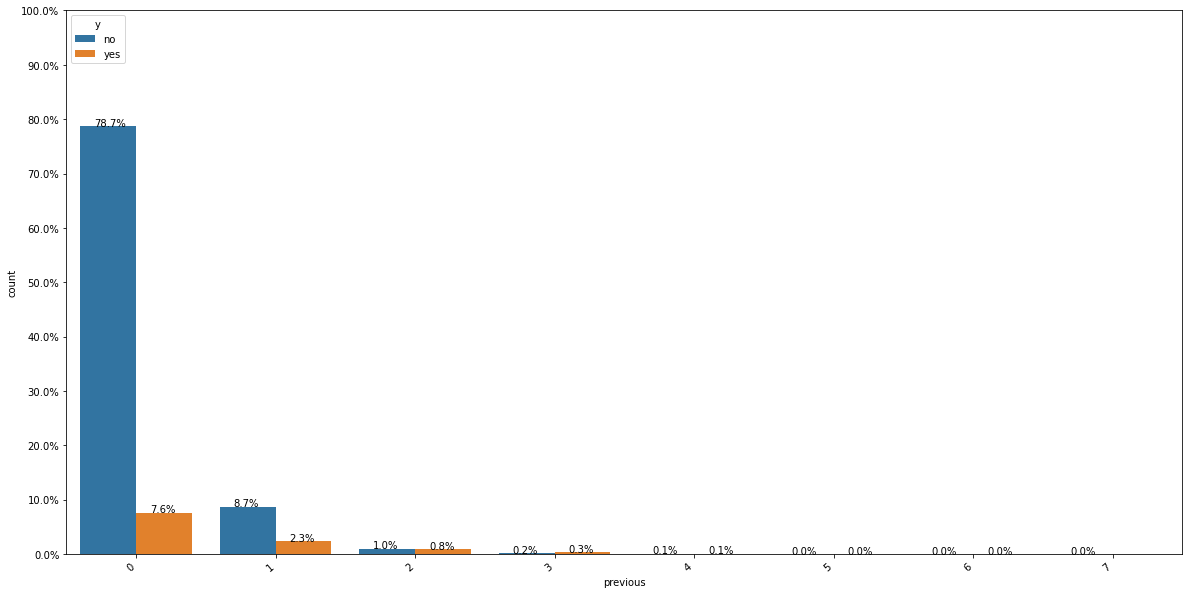

In [19]:
histogramPlot("previous", data)

We can clearly see that this particular feature has the value 0 for more than 86% of our customers. None of these customers have been contacted before this ad marketing campaign. I'm not sure if including this feature will add any value to our model.

## EMP.VAR.RATE

In [20]:
print(data['emp.var.rate'].value_counts())

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64


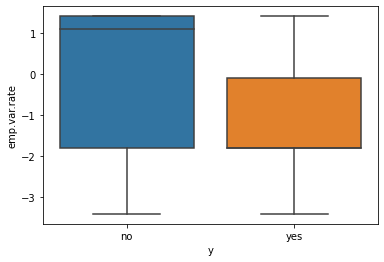

In [21]:
sns.boxplot(data = data, x = "y", y = "emp.var.rate")
plt.show()

I was initially skeptical of including this feature in our model, because it takes on only a small set of values. But on looking at this boxplot, it is clear that there is quite a significant difference between these plots for customers who subscribed vs customers who didn't bother subscribing.

This means that this feature could potentially play a key role in predicting the target variable "y"

## CONS.PRICE.IDX

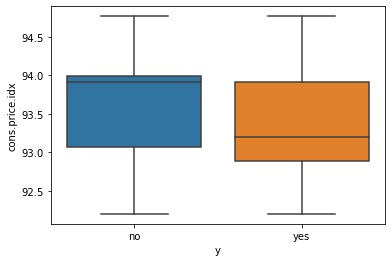

In [22]:
sns.boxplot(data = data, x = "y", y = "cons.price.idx")
plt.show()

The medians are quite different even though the two plots have similar Inter-quartile ranges (IQRs). It's hard to definitively discard/retain this feature from our model by just looking at this boxplot. But, we will keep it for now.

## CONS.CONF.IDX

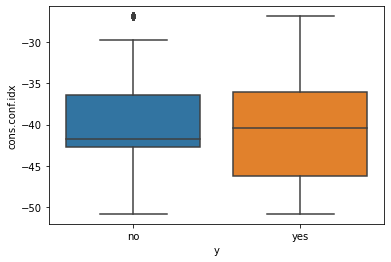

In [23]:
sns.boxplot(data = data, x = "y", y = "cons.conf.idx")
plt.show()

I'm again seeing some discernable differences between the two boxplots, so I'm inclined to retain this feature as well!

## EURIBOR3M

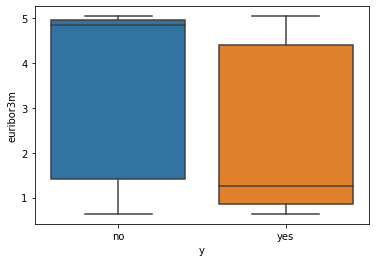

In [24]:
sns.boxplot(data = data, x = "y", y = "euribor3m")
plt.show()

Again, the IQRs as very similar even though there is a stark difference in the medians. We will retain this feature for now.

## NR.EMPLOYED

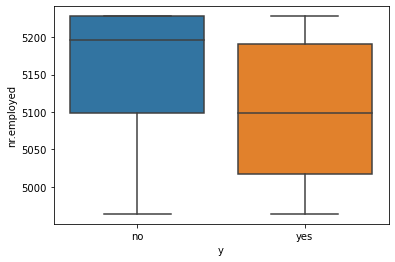

In [25]:
sns.boxplot(data = data, x = "y", y = "nr.employed")
plt.show()

The first quartile (Q1) of the "no" boxplot coincides with the median (Q2) of the "yes" boxplot. Let's retain this feature for the time being.

Let us now construct the correlation matrix which shows the correlation between all pairs of features. A positive correlation indicates the extent to which the variables both increase/decrease in unison. A negative correlation indicates the extent to which one variable decreases as the other one increases and vice versa.

In [26]:
#Printing out the correlation matrix between different features

corr = data.corr()
print(corr)

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.000083  0.003844 -0.029472  0.025458   
duration        0.000083  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.003844 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.029472 -0.047577  0.052584  1.000000 -0.587514   
previous        0.025458  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.003354 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx -0.003307  0.006213  0.129056  0.079697 -0.204180   
cons.conf.idx   0.128753 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.007957 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.019165 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.003354       -0.003307       0.128753   0.007957   
duration           -0.027968        0.006213      -0.008173  -0.032897   
campaign            0.150754 

This is the correlation matrix between different features. The features "euribor3m", "emp.var.rate" and "nr.employed" are the features with the highest correlation.

How does this matrix help us in feature selection ?

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

Let us retain only those features which have a cross correlation of lesser than 0.95 and let's drop one of the two features which have a cross correlation greater than 0.95.

Doing this leads us to dropping the feature "emp.var.rate".

We will also drop the feature "day_of_week" because of the explanantion I provided earlier (similar distribution across all categories).

We will not be considering the feature "duration" here because it is a feature we don't have access to until the very last minute and is hence useless for making predictions, simply, because it isnt available beforehand.

We will also discard the variable "campaign" here because the boxplots for "yes" and "no" were very similar. And there seemed to be no correlation between the number of times a customer was contacted and their likelihood of actually subscribing to a term product.

So following are the categorical features we will consider - 
1. job
2. marital
3. education
4. default
5. housing
6. loan
7. contact
8. month
9. poutcome

And following are the numeric features we will consider - 
1. age
2. pdays
3. previous
4. cons.price.idx
5. cons.conf.idx
6. euribor3m
7. nr.employed

## DATA PREPARATION

Now, we should address how are we going to represent our features.

Numeric features aren't going to be an issue and they're going to be represented the same way we find them in the dataset.

Categorical features are the real issue.

We will use one-hot encoding to represent our categorical features here. It is the most popular type of encoding for categorical features and is quite effective. Let me give you some insight as to why one hot encoding for this business case.

If we take a look at our categorical features here, the features with the highest cardinality are 'month' and 'job' (Each have 12 categories). 12 is still a very small value and it is perfectly acceptable to work with vectors of length 12 with limited compute power and no GPU. Sure, if we were working in an NLP setting, where we wanted to capture semantics, we could've used word2vec to obtain word embeddings and we'd then have vectors of similar words aligned close together. But, we're not in an NLP setting. It is totally acceptable to work with vectors of length 12. It is also very conveient, easy-to-use and is an all-in-all no fuss method.

Also note that this dataset is already quite clean, so we don't need to worry about any additional cleaning. The numeric features here also don't take on very crazy values, so there's no need for normalization here as well.

In [143]:
#Separating features and target values

data.drop(['emp.var.rate', 'day_of_week', 'duration', 'campaign'], axis = 1, inplace = True)

data_x = data.iloc[:,:-1]
data_y = data["y"]

print(data_x.shape)

print(data_y.shape)

(41188, 16)
(41188,)


## SPLITTING DATA INTO TRAINING AND TEST SETS

In [144]:
from sklearn.model_selection import train_test_split

#performing an 80-20 split to get training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)

(32950, 16)
(8238, 16)


In [145]:
#Replacing "yes" with 1 and "no" with 0
y_train.replace({"no":0, "yes":1}, inplace = True)
y_test.replace({"no":0, "yes":1}, inplace = True)

## ONE HOT ENCODING THE CATEGORICAL FEATURES

In [146]:
from sklearn.feature_extraction.text import CountVectorizer

def add_to_dataframe(sp, data, vectorizer, name):
 
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name + "_" + col
    
    data[colname] = sp[:, i].toarray().ravel().tolist()
  
  return data

def OneHotEncoder(categorical_cols, X_train, X_test):

    for i in categorical_cols:
        
        Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
        print("Performing One-Hot Encoding for -----> ", i)

        # Encoding training dataset 
        temp_cols = Vectorizer.fit_transform(X_train[i])
        X_train = add_to_dataframe(temp_cols, X_train, Vectorizer, i)

        # Encoding Test dataset
        temp_cols = Vectorizer.transform(X_test[i])
        X_test = add_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [147]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

OneHotEncoder(categorical_cols, X_train, X_test)

# Drop the categorical features as the one hot encoded representation is present

X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

Performing One-Hot Encoding for ----->  job
Performing One-Hot Encoding for ----->  marital
Performing One-Hot Encoding for ----->  education
Performing One-Hot Encoding for ----->  default
Performing One-Hot Encoding for ----->  housing
Performing One-Hot Encoding for ----->  loan
Performing One-Hot Encoding for ----->  contact
Performing One-Hot Encoding for ----->  month
Performing One-Hot Encoding for ----->  poutcome


In [148]:
print(X_train.shape, X_test.shape)

(32950, 55) (8238, 55)


## Checking for missing values

In [149]:
count = 0
cols_nan = []
for col in data.columns.values.tolist():
    for j in list(data[col]):
        if pd.isnull(j):
            count += 1
            if cols_nan.count(col) == 0:
                cols_nan.append(col)
        
print("There are {} missing values our dataset in total.".format(count))
print("The following columns have missing values - {}.".format(cols_nan))

There are 8892 missing values our dataset in total.
The following columns have missing values - ['age', 'cons.price.idx'].


So 'age' and 'cons.price.idx' are the only two columns with missing values and we need to impute data in only these two columns. We will impute the missing data using the k Nearest Neighbors Method. We will find the top 10 closest data points based on a similarity metric and either assign the average (for age) or the maximally occuring value (for cons.price.idx). And if there are any ties, we're breaking them arbitrarily

In [150]:
print(X_train.shape, X_test.shape)

(32950, 55) (8238, 55)


In [151]:
X = pd.concat([X_train, X_test])
print(X.shape)

(41188, 55)


In [152]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 24654 to 10538
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            37444 non-null  float64
 1   pdays                          41188 non-null  int64  
 2   previous                       41188 non-null  int64  
 3   cons.price.idx                 36040 non-null  float64
 4   cons.conf.idx                  41188 non-null  float64
 5   euribor3m                      41188 non-null  float64
 6   nr.employed                    41188 non-null  float64
 7   job_admin.                     41188 non-null  int64  
 8   job_blue-collar                41188 non-null  int64  
 9   job_entrepreneur               41188 non-null  int64  
 10  job_housemaid                  41188 non-null  int64  
 11  job_management                 41188 non-null  int64  
 12  job_retired                    41188 non-n

## IMPUTING VALUES FOR CONS.PRICE.IDX (CATEGORICAL)

I am constructing two probability distributions to perform the imputations here. p_yes computes the probability for each of the possible values of 'cons.price.idx' when the target variable = 'yes' and vice versa. The idea here is to capture the true underlying distribution using the empirical probabilities. So, what we're doing is consistent with Maximum Likelihood Estimation (MLE).

So, to fill out the data values for missing points, I will first look at the target variable value. If it is a yes, I will sample from p_yes, otherwise I will sample from p_no to fill out cons.price.idx

In [153]:
p_yes = dict(data[data['y'] == 'yes']['cons.price.idx'].value_counts())
normalizing_factor = sum(list(p_yes.values()))

for key in p_yes.keys():
    p_yes[key] /= normalizing_factor
    
#print(p_yes)
    
p_no = dict(data[data['y'] == 'no']['cons.price.idx'].value_counts())
normalizing_factor = sum(list(p_no.values()))

for key in p_no.keys():
    p_no[key] /= normalizing_factor

#print(p_no)

In [234]:
#Sampling from p_yes/p_no according to the value of the target variable for imputing cons.price.idx

for i in range(len(X_train)):
    if pd.isnull(X_train.iloc[i]['cons.price.idx']):
        if y_train.iloc[i] == 1:
            X_train.iat[i, 3] = np.random.choice(list(p_yes.keys()), p = list(p_yes.values()))
            #print(X_train.iloc[i]['cons.price.idx'])
        else:
            X_train.iat[i, 3] = np.random.choice(list(p_no.keys()), p = list(p_no.values()))
            #print(X_train.iloc[i]['cons.price.idx'])

print("Imputation done!")

Imputation done!


In [155]:
#imputing for the Test Set

for i in range(len(X_test)):
    if pd.isnull(X_test.iloc[i]['cons.price.idx']):
        if y_test.iloc[i] == 1:
            X_test.iat[i, 3] = np.random.choice(list(p_yes.keys()), p = list(p_yes.values()))
            #print(X_train.iloc[i]['cons.price.idx'])
        else:
            X_test.iat[i, 3] = np.random.choice(list(p_no.keys()), p = list(p_no.values()))
            #print(X_train.iloc[i]['cons.price.idx'])

print("Imputation done!")

Imputation done!


## IMPUTATION FOR AGE (NUMERIC)

Now to impute a feature like age, the natural question would be which relevant features should be considered while measuring the similarity between data points. I'm only going to consider features like job, marital, education, default, housing, loan and contact because they seem most relevant indicators of a customer's age. Features like day_of_week or month don't really say much about a customer's age

Because kNN will take a lot of time to execute if we search for "similar" neighbors for every missing datapoint over the entire dataset, I've implemented a quicker, less efficient version which does similarity checks only over the first 500 tuples in the set. This should still perform better than simpler, primitive methods like replacing with the most common value, replacing with the mean, median, mode, etc.

In [180]:
#Imputing for Training Set

for i in tqdm(range(len(X_train))):
    if pd.isnull(X_train.iloc[i]['age']):
        distances = []
        for j in range(500):
            distance = 0
            for k in range(7,42):
                distance += (X_train.iat[i, k] - X_train.iat[j, k])**2
            distances.append(distance)
        idx = np.argpartition(np.array(distances), 50)
        ages = [X_train.iloc[i]['age'] for i in idx[:50]]
        ages = [x for x in ages if math.isnan(x) == False]
        X_train.iat[i, 0] = sum(ages)/len(ages)

100%|█████████████████████████████████████| 32950/32950 [16:53<00:00, 32.52it/s]


In [182]:
#Imputing for Test Set

for i in tqdm(range(len(X_test))):
    if pd.isnull(X_test.iloc[i]['age']):
        distances = []
        for j in range(500):
            distance = 0
            for k in range(7,42):
                distance += (X_test.iat[i, k] - X_test.iat[j, k])**2
            distances.append(distance)
        idx = np.argpartition(np.array(distances), 50)
        ages = [X_test.iloc[i]['age'] for i in idx[:50]]
        ages = [x for x in ages if math.isnan(x) == False]
        X_test.iat[i, 0] = sum(ages)/len(ages)

100%|███████████████████████████████████████| 8238/8238 [03:45<00:00, 36.58it/s]


## LOGISTIC REGRESSION

In [188]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = 'balanced', max_iter = 1000)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC Score using Logistic Regression is {}".format(roc_auc_score(y_test, y_pred[:,1])))

AUC Score using Logistic Regression is 0.7836908027281405


We have an AUC Score of 0.78 here which is actually pretty good! An AUC Score of closer to 0 indicates poor performance, while an AUC Score of closer to 1 indicates excellent model performance. And since we're so much more closer to 1 here, we can deduce that we've done a good job here !

Also, a subtle thing to notice here is the 'class_weight' parameter in sklearn's Logistic Regression. Setting this to 'balanced' takes care of imbalanced classes we talked about earlier very well.

## RBF KERNEL SVM

In [200]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
alpha = [10**x for x in range(-3,3)]
auc_arr = []

for i in tqdm(alpha):
    SVM = SVC(C = i, class_weight = 'balanced', kernel = 'rbf')
    SVM.fit(X_train, y_train)
    sig = CalibratedClassifierCV(SVM, method = "sigmoid")
    sig.fit(X_train, y_train)
    predictions = sig.predict_proba(X_test)
    auc_arr.append(roc_auc_score(y_test, predictions[:,1]))

for i in range(len(auc_arr)):
    print("AUC for C = ", alpha[i], "is", auc_arr[i])

100%|████████████████████████████████████████████| 6/6 [33:53<00:00, 338.88s/it]

AUC for C =  0.001 is 0.7541877408407233
AUC for C =  0.01 is 0.7541115161443908
AUC for C =  0.1 is 0.7559316739412391
AUC for C =  1 is 0.7666410971900058
AUC for C =  10 is 0.7663095197609593
AUC for C =  100 is 0.7708533911781055


## XGBOOST

In [199]:
from xgboost import XGBClassifier

alpha = [10, 50, 100, 500, 1000, 2000]

auc_arr = []

for i in tqdm(alpha):
    classifier = XGBClassifier(n_estimators = i, tree_method = "hist", use_label_encoder = False, eval_metric = "logloss")
    classifier.fit(X_train, y_train)
    sig = CalibratedClassifierCV(classifier, method = "sigmoid")
    sig.fit(X_train, y_train)
    predictions = sig.predict_proba(X_test)
    auc_arr.append(roc_auc_score(y_test, predictions[:,1]))
    
for i in range(len(auc_arr)):
    print("AUC for number of estimators = {} is {}".format(alpha[i], auc_arr[i]))

100%|█████████████████████████████████████████████| 6/6 [00:51<00:00,  8.66s/it]

AUC for number of estimators = 10 is 0.8074125878636211
AUC for number of estimators = 50 is 0.8108336841623844
AUC for number of estimators = 100 is 0.8037368717619163
AUC for number of estimators = 500 is 0.7712961540536294
AUC for number of estimators = 1000 is 0.7580521130658512
AUC for number of estimators = 2000 is 0.7480194771689443


## COMPARING MODEL PERFORMANCE

All three models have performed reasonably well here, with XGBoost performing marginally better with 50 estimators. Logistic Regression comes in second place, while RBF Kernel SVM comes in third place and is not too behind.

I would NOT pick the RBF Kernel SVM for implementation, because as you can see it took a whopping 34 minutes to train and test and it also came in last place in terms of its performance via AUC. Kernelized SVM is also generally known to overfit because of its ability to learn ridiculously complex decision boundaries.

Also, if we take a look at the formula of the RBF Kernel - 

$$ exp(\frac{-||x - y||_2^2}{2\sigma^2}) $$

It needs to learn the Sigma parameter, in addition to the regularization constant, which is the standard deviation of the Gaussian Distribution. So, to determine a good setting of these parameters, we ideally use methods like Grid Search which is pretty time consuming. So, unless absolutely necessary, I'd stay away from using Kernel SVMs in general because they're pretty complex.



As we can see Logistic Regression has done pretty well here! One major drawback of Logistic Regression is that it constructs linear decision boundaries. So, if our dataset is really not linearly separable, logistic regression wouldn't work well at all. But, since we have pretty decent results, I'm assuming there was some degree of linear separabality which our Logistic Regression Model was able to exploit.

There is never a reason to not implement Logistic Regression. It is simple, easy to implement and ridiculously quick. This is a model I always keep in the back of my mind whenever I'm dealing with classification (binary or multinomial). But, in a lot of practical scenarios, we often don't have any kind of linear separability in our datasets, so Logistic Regression doesn't produce good results. But, its clearly worked in this case, so why not!

Finally, we come to XGBoost, our best performing model ! XGBoost is ridiculously popular among ML practitioners because it's fast and works pretty well on a wide plethora of dataset types. But, a small problem with decision tree based methods is that the if the tree learned is too deep, we'll again land up in overfitted territory, especially if our data is too noisy. Comparing XGBoost with more advanced boosting techniques like CatBoost/LightGBM, a minor disadvantage that comes out is that we explicitly need to label encode all our categorical features before feeding them into XGBoost. On the other hand, CatBoost/LightGBM takes care of this step for you!

But, again, in this case, there is no real reason why someone wouldn't use XGBoost. It has, after all, outperformed our first two models.

To sum up, I wouldn't use RBF Kernel SVMs, but I'd totally resort to using Logistic Regression & XGBoost for this business case. Also if none of these methods were to produce decent results, I would go for Neural Networks. A little more work to train, but a lot more rewarding !

## How does this analysis help the bank?

In [219]:
p = predictions[:,1]
X_test["y"] = [1 if ele >= 0.5 else 0 for ele in p]

count = 0
for ele in predictions:
    if ele[1] >= ele [0]:
        count += 1
print("XGBoost predicts {} customers out of the {} customers in the test set will subscribe to a term deposit.".format(count, len(X_test)))

XGBoost predicts 172 customers out of the 8238 customers in the test set will subscribe to a term deposit.


This gives the bank an idea of the probability that their average customer will subscribe to a term deposit (172/8238 = 0.02087)

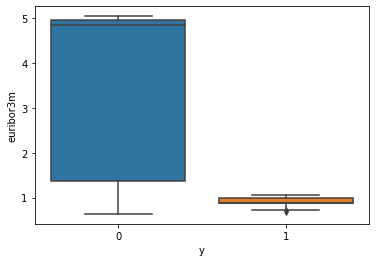

In [228]:
sns.boxplot(data = X_test, x = "y", y = "euribor3m")
plt.show()

We can look at this boxplot of "euriobor3m" of predictions based on our XGBoost Model on the test set. The bank should clearly target their ads marketing campaign at customers with lower values of this feature, since they seem to be more likely to subscribe to a term deposit.

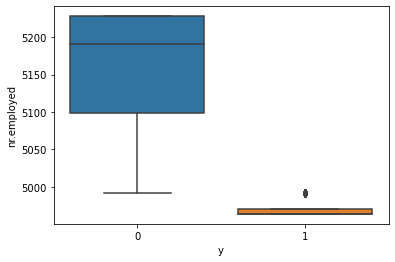

In [231]:
sns.boxplot(data = X_test, x = "y", y = "nr.employed")
plt.show()

Again, we look at these two boxplots for "nr.employed" on our test set tested on the XGBoost Model. We can see that our model is more likely to predict a "yes" for customers with much lower values of "nr.employed".

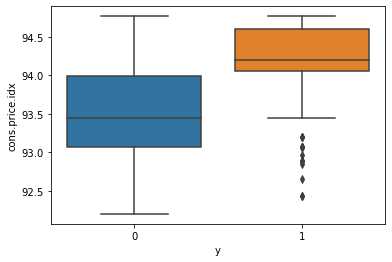

In [233]:
sns.boxplot(data = X_test, x = "y", y = "cons.price.idx")
plt.show()

The opposite seems to be happening with the feature "cons.price.idx". Our model is inclining to predict a "yes" when this feature goes up in value and starts to predict a "no" as this feature value drops.

The banking institution can do this sort of analysis using the trained XGBoost Model on the test set to try and guage what kinds of customers are more/less likely to subscribe to term deposits and target their ads accordingly !

## What additional data would I ask from the bank?

Since most of our customers are new and we don't have any data about them from the previous ad marketing campaign, we should try and use a different kind of feature that indicates their likelihood of subscribing to a term deposit.

Instead of looking at the success of the previous campaign, we could have a binary feature that indicates if the customer has subscribed to a term deposit with the bank in the past or not. Now, this is a feature we can easily collect values for and we don't even need to get in touch with our customers for this feature value.

Another feature that could be indicative of a customer's intent to purchase a term deposit with the bank could be the number of years for which they've been customers. Long time customers could potentially have more faith in the bank and could subscribe to term deposits as opposed to new customers.

Another feature could be the customer's past history of subscribing to other perks the bank has to offer. Some customers open a bank account to simply save their money and do not want to do anything with any banking offers because they could be investing or earning interest elsewhere. And then there are some customers who try and avail a lot of bank perks, because it is probably their only source of interest. A variable which indicates a customer's past trend of availing/not availing other benefits the bank has to offer could also be a direct influence over whether they subscribe to a term deposit or not.